## Machine Learning

### Regressão Simples

Machine Learning (ML)
Regressão é uma técnica de aprendizado supervisionado usada para prever um valor numérico contínuo (como preço, temperatura, demanda) com base em dados históricos e variáveis de entrada, encontrando a relação matemática (uma função) entre as características (variáveis independentes) e o resultado (variável dependente) para fazer previsões futuras

In [2]:
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"  
df = pd.read_csv(url)
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
305,3.6,6,10.9,251
497,1.5,4,7.7,177
715,2.5,4,7.6,175
674,3.5,6,11.7,269
417,3.7,6,10.6,244
983,3.5,6,11.2,258
707,2.0,4,7.0,161
349,6.8,10,21.2,488
39,3.0,6,11.2,258


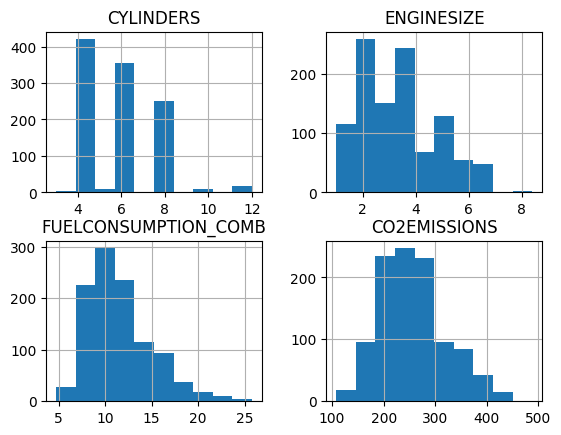

In [7]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

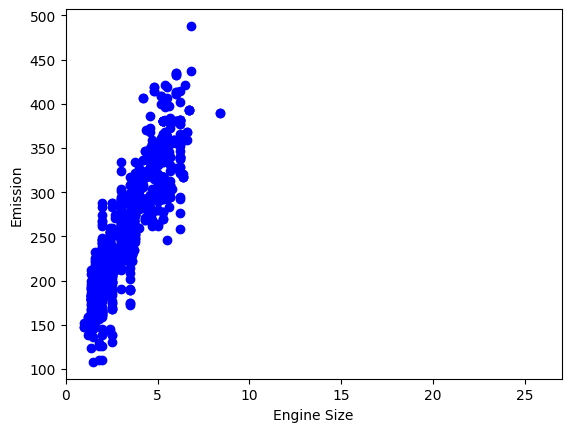

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.xlim(0, 27)
plt.show()

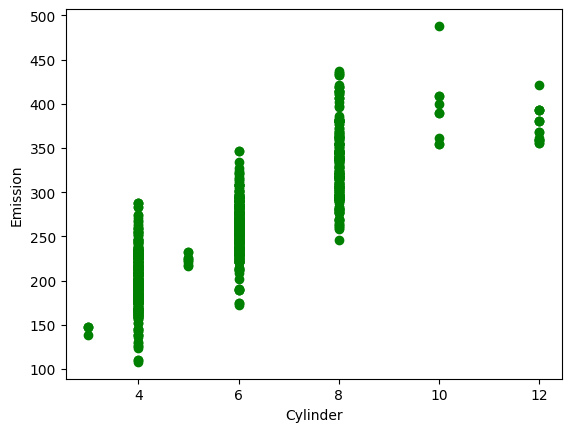

In [9]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='green')
plt.xlabel("Cylinder")
plt.ylabel("Emission")
plt.show()

In [10]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

type(X_train), np.shape(X_train)

(numpy.ndarray, (853,))

#### Criando um modelo de Regressão Simples

In [11]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train) #para treinar o modelo, precisamos reshape X_train para que ele deixe de ser um array 1D para um array 2D

print ('Coefficients: ', regressor.coef_[0])
print ('Intercept: ',regressor.intercept_)

Coefficients:  38.992978724434074
Intercept:  126.28970217408721


 "compatible shape" = garantir que os arrays tenham dimensões compatíveis para trabalhar juntos; 
 "reshape" = reorganizar as dimensões do array para o formato esperado pela função.



Text(0, 0.5, 'Emission')

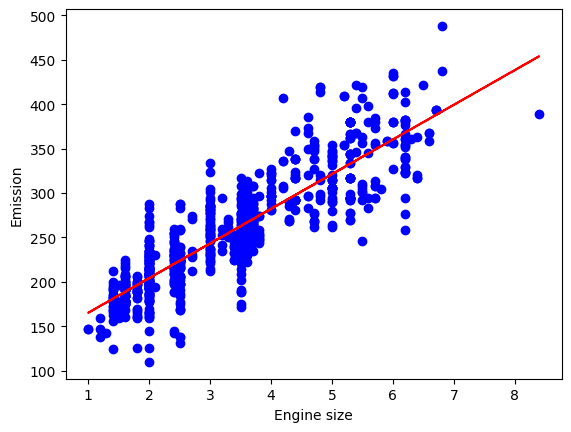

In [12]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Avaliando o modelo:

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regressor.predict(X_test.reshape(-1, 1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test, y_pred))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


Exercícios de Fixação:

1. Plot the regression model result over the test data instead of the training data. Visually evaluate whether the result is good.
2. Select the fuel consumption feature from the dataframe and split the data 80%/20% into training and testing sets.
3. Train a linear regression model using the training data you created.
4. Use the model to make test predictions on the fuel consumption testing data.
5. Calculate and print the Mean Squared Error of the test predictions.

Text(0, 0.5, 'Emission')

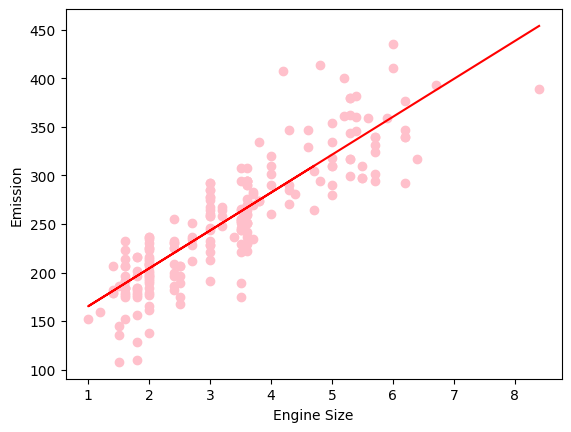

In [14]:
plt.scatter(X_test, y_test, color = 'pink')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')


In [15]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [16]:
regressor = linear_model.LinearRegression()
regressor.fit(X_train.reshape(-1, 1), y_train) #para treinar o modelo, precisamos reshape X_train para que ele deixe de ser um array 1D para um array 2D

print ('Coefficients: ', regressor.coef_[0])
print ('Intercept: ',regressor.intercept_)

Coefficients:  16.180900781199195
Intercept:  69.10302617988444


In [17]:
y_pred = regressor.predict(X_test.reshape(-1, 1))

In [18]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 797.43


#### Regressão Linear Múltipla (Funções de Múltiplas Variáveis)

In [19]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

Usamos o .corr() para analisarmos a correlação entre diferentes variáveis para escolhermos as ideias para nosso modelo de regressão múltipla.

In [20]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [21]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [22]:
df.head()

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244


Criamos um gráfico para visualizar a relação entre diferentes variáveis:

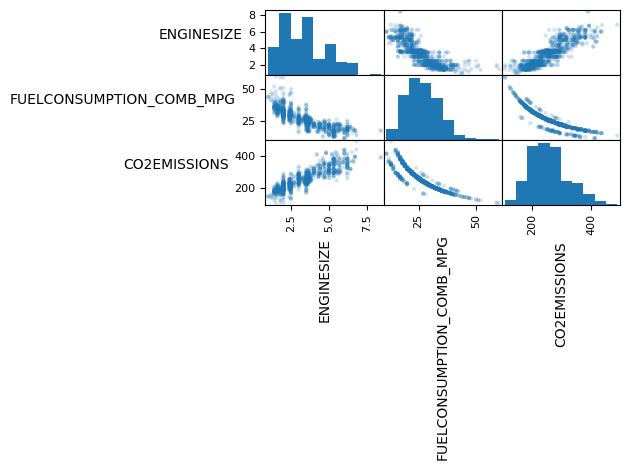

In [23]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [24]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

print(X)
print(y)

[[ 2.  33. ]
 [ 2.4 29. ]
 [ 1.5 48. ]
 ...
 [ 3.  24. ]
 [ 3.2 25. ]
 [ 3.2 22. ]]
[[196]
 [221]
 [136]
 ...
 [271]
 [260]
 [294]]


You should standardize your input features so the model doesn't inadvertently favor any feature due to its magnitude. The typical way to do this is to subtract the mean and divide by the standard deviation. Scikit-learn can do this for you. Uma variável standard possui média = 0 e desvio padrão = 1

In [25]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

Treinamos o modelo:

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

Criamos o modelo:

In [27]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


The Coefficients and Intercept parameters define the best-fit hyperplane to the data. Since there are only two variables, hence two parameters, the hyperplane is a plane. But this best-fit plane will look different in the original, unstandardized feature space. 

Criando um modelo de visualização 3d:

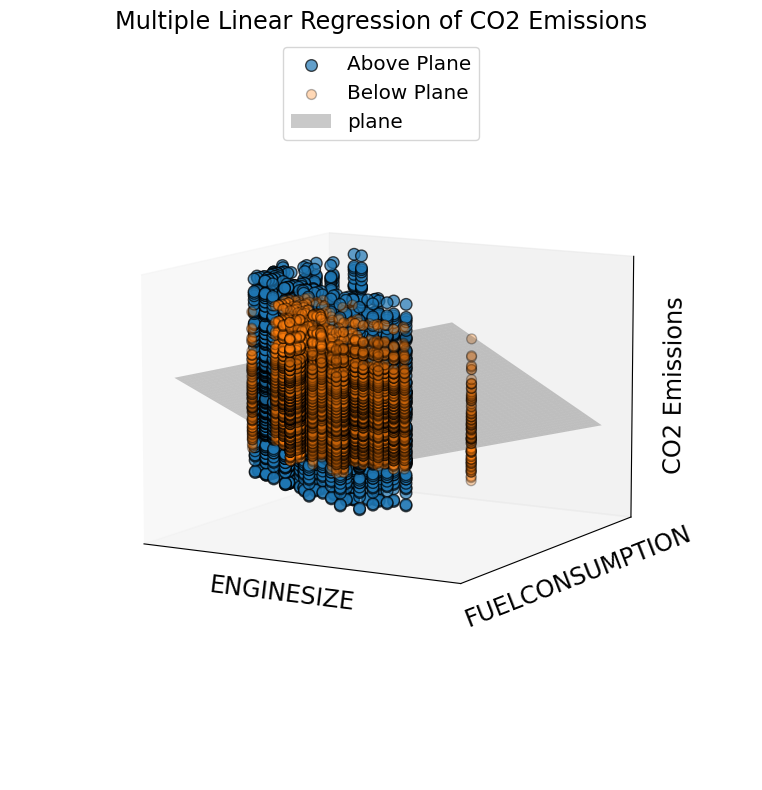

In [28]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

Exercícios Propostos: 

1. Determine and print the parameters for the best-fit linear regression line for CO2 emission with respect to engine size.
2. Produce a scatterplot of CO2 emission against ENGINESIZE and include the best-fit regression line to the training data. 
3. Generate the same scatterplot and best-fit regression line, but now base the result on the test data set. Consider how the test result compares to the training result.
4. Repeat the same modeling but use FUELCONSUMPTION_COMB_MPG as the independent variable instead. Display the model coefficients including the intercept.
5. Generate a scatter plot showing the results as before on the test data. Consider well the model fits, and what you might be able to do to improve it. We'll revisit this later in the course.

In [29]:
X_train_1 = X_train[:, 0]

regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1.reshape(-1, 1), y_train)  # Corrigir aqui
coef_1 = regressor_1.coef_
intercept_1 = regressor_1.intercept_

print ('Coefficients: ', coef_1)
print ('Intercept: ', intercept_1)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


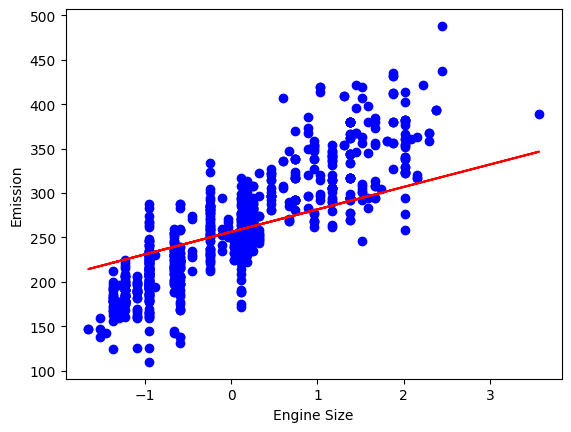

In [30]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('Emission')
plt.show()

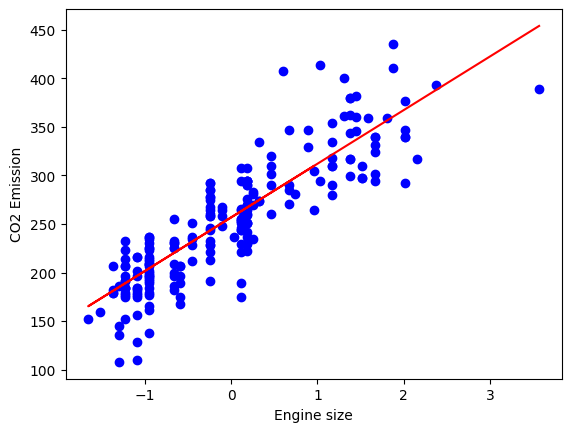

In [31]:

X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test,  color='blue')
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()

In [32]:
X_train_2 = X_train[:,1]
regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1, 1), y_train)
coef_2 =  regressor_2.coef_
intercept_2 = regressor_2.intercept_
print ('Coefficients: ',coef_2)
print ('Intercept: ',intercept_2)

Coefficients:  [[-58.51827989]]
Intercept:  [256.09392179]


Text(0, 0.5, 'CO2 Emission')

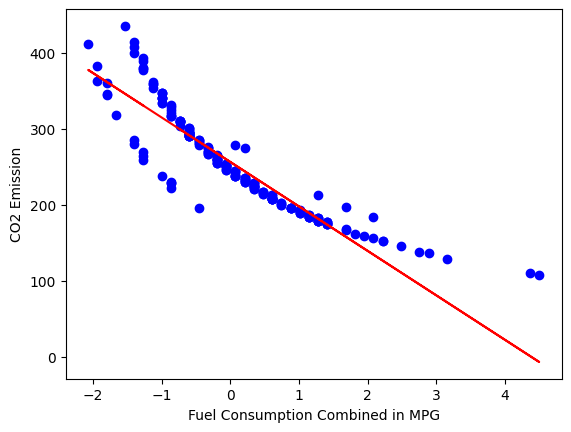

In [33]:
X_test_2 = X_test[:,1]
plt.scatter(X_test_2, y_test,  color='blue')
plt.plot(X_test_2, coef_2[0]*X_test_2 + intercept_2, '-r')
plt.xlabel("Fuel Consumption Combined in MPG")
plt.ylabel("CO2 Emission")

### Regressão Logistíca

<h5>1. O que é o Treinamento da Regressão Logística?</h5>

O objetivo principal é criar um modelo capaz de classificar dados (por exemplo: "Sim" ou "Não", "Classe 0" ou "Classe 1") com o menor erro possível.

Para fazer isso, o computador precisa encontrar os melhores "ajustes" para a equação matemática. Esses ajustes são chamados de parâmetros ou Theta (θ).

O processo resumido:

* Escolha valores aleatórios para começar (θ inicial).

* Faça uma previsão.

* Calcule o quanto você errou (o Custo).

* Ajuste os parâmetros (θ) para diminuir esse erro.

* Repita até o erro ser mínimo.

<h5>2. A Conexão com a Regressão Linear</h5>

A Regressão Logística, na verdade, contém uma Regressão Linear "dentro" dela.

*Passo 1 (A parte Linear): Primeiro, calculamos uma linha reta baseada nos dados de entrada (x) e nos parâmetros (θ). Chamamos esse resultado de z.
                
z=θ0​+θ1​x1​+θ2​x2​+...

*Passo 2 (A Transformação): Como queremos classificar algo (probabilidade entre 0 e 1), não podemos usar o número z diretamente (que pode ser qualquer valor, como 1000 ou -50). Por isso, aplicamos a Função Sigmoide. Ela "espreme" o resultado da linha reta para ficar entre 0 e 1.

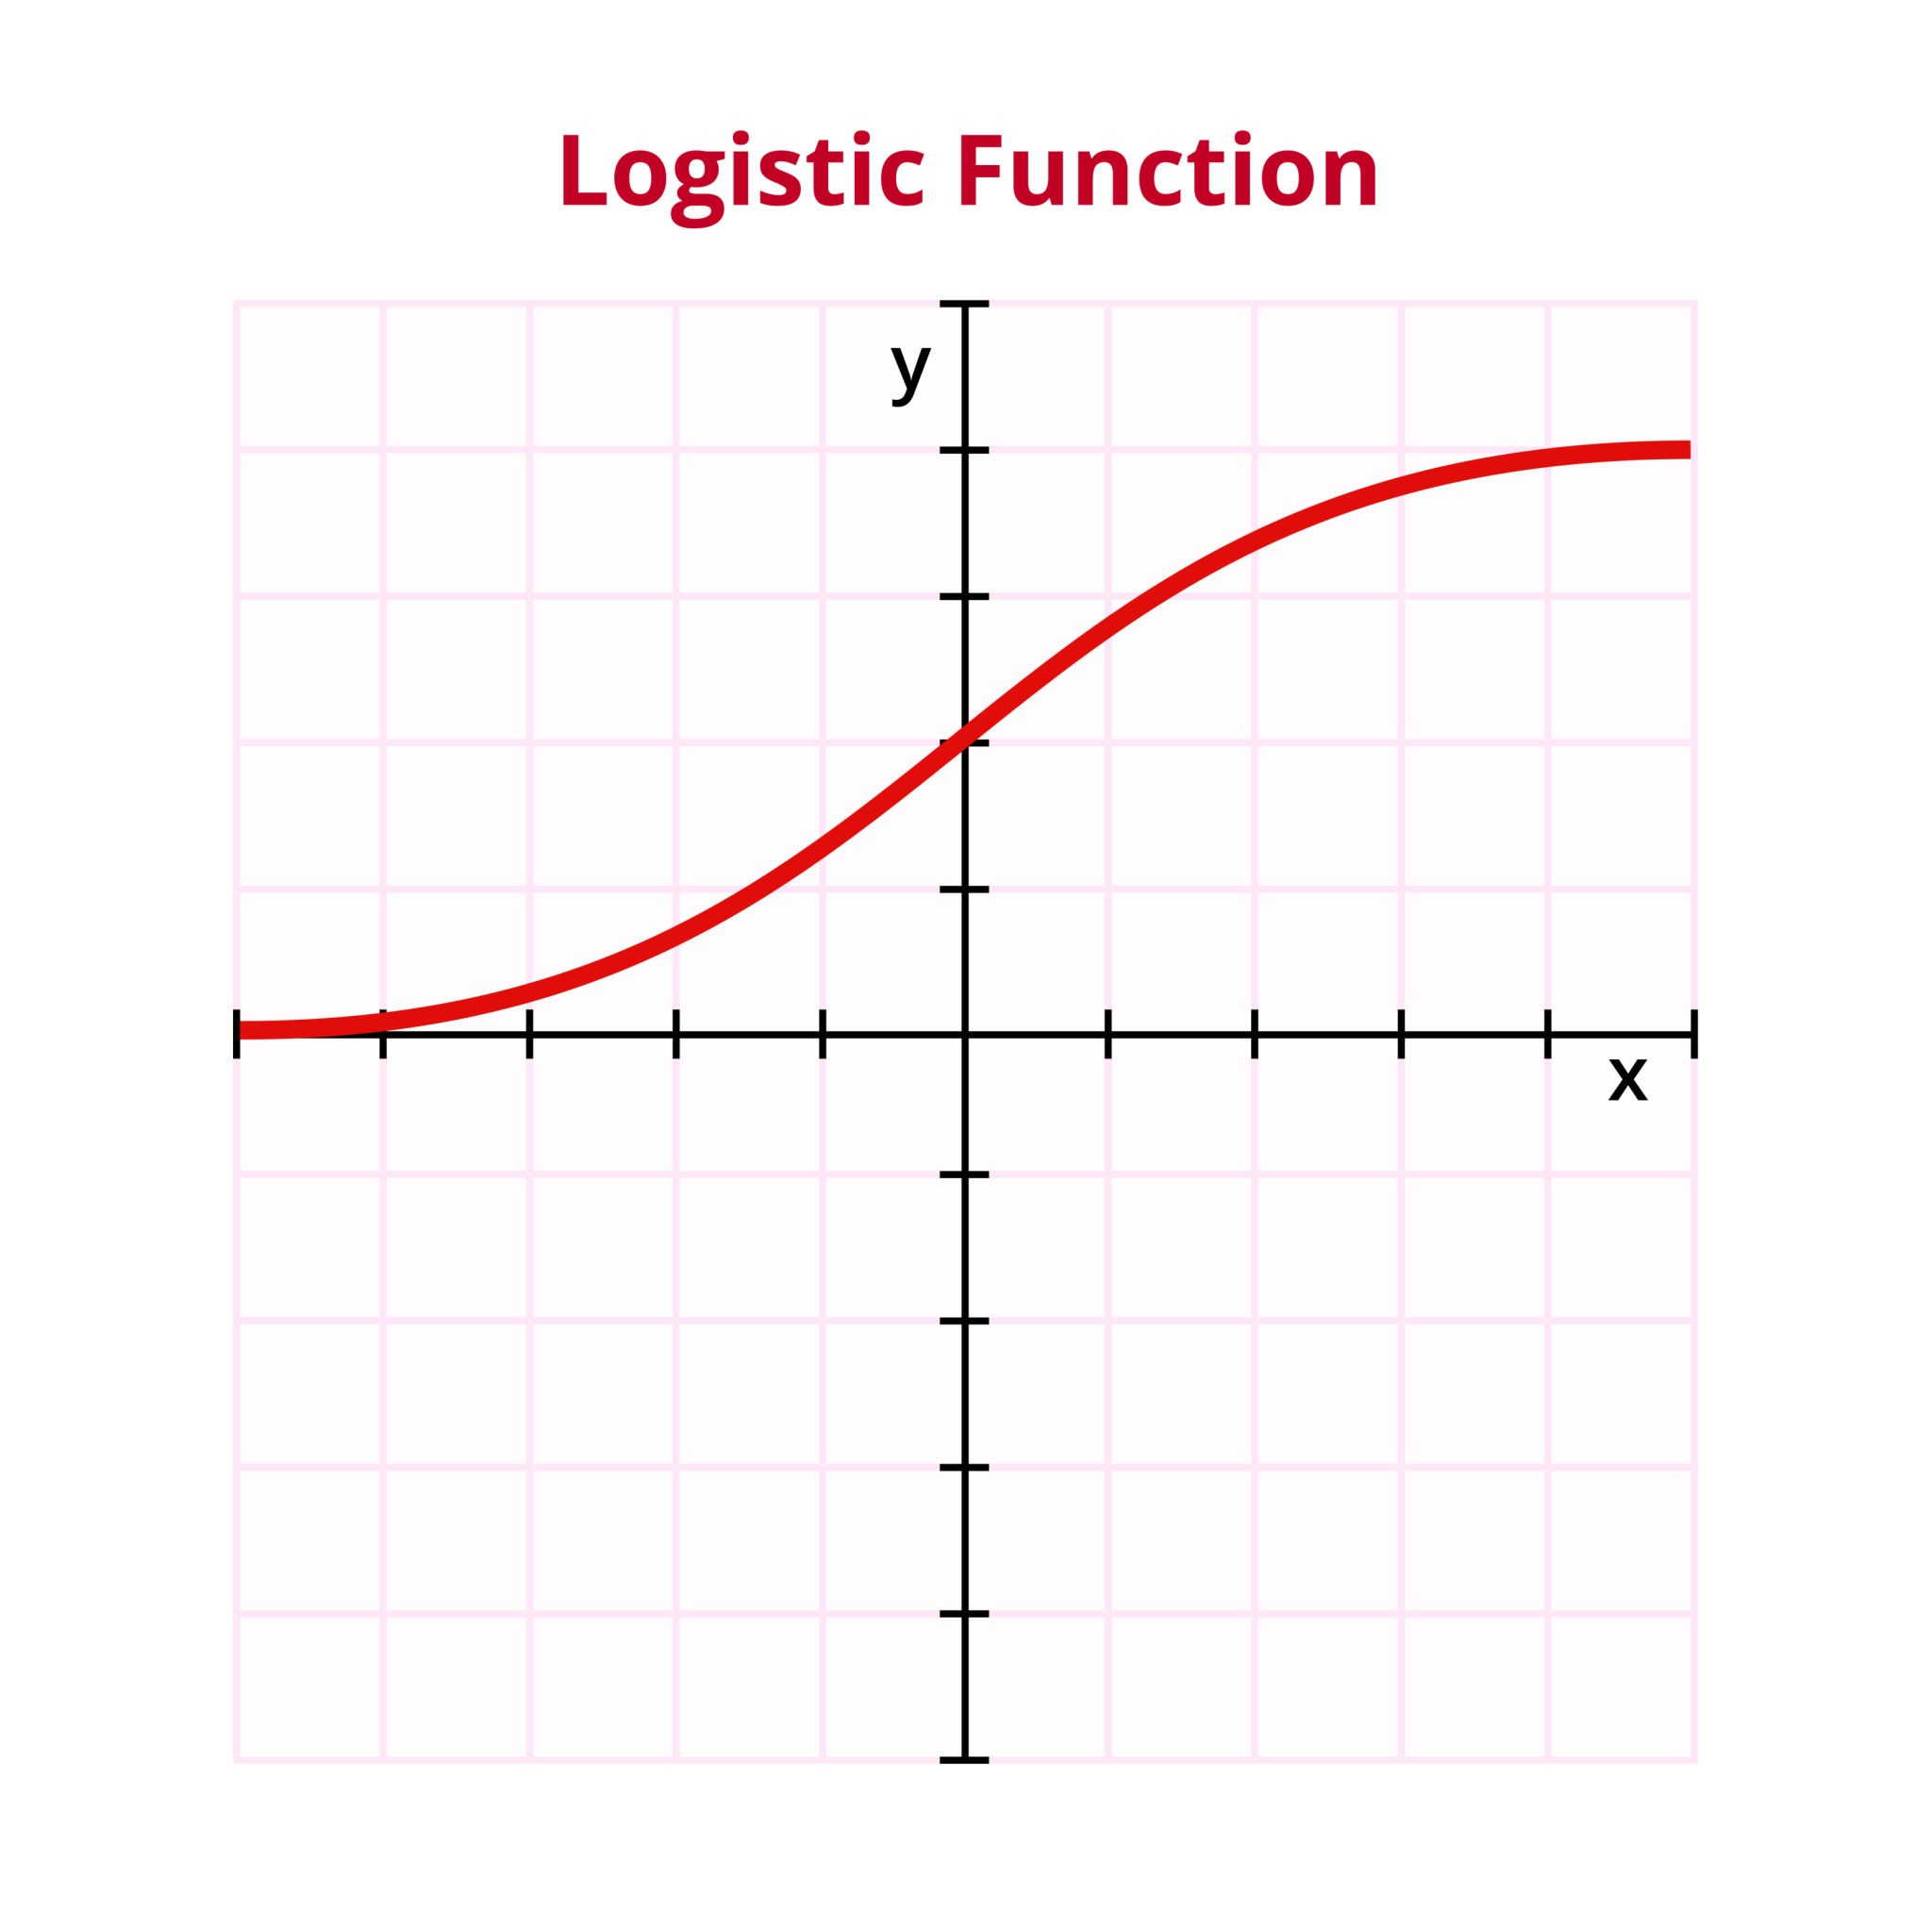

<h5>3. Log Loss (A Função de Custo)</h5>

Como sabemos se o modelo está indo bem? Precisamos medir o erro. Na Regressão Logística, usamos uma métrica chamada Log Loss (Perda Logarítmica).

O Log Loss é severo: ele penaliza muito se o modelo estiver confiante e errado.

Se o modelo diz "Tenho 99% de certeza que é Classe 1", mas a verdade é Classe 0, o Log Loss será altíssimo.

A Fórmula do Log Loss: O objetivo do treinamento é minimizar J(θ):

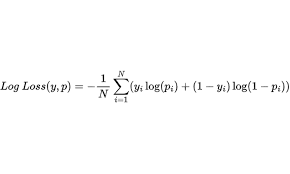

* n: Número de observações (linhas de dados).

* yi​: A classe real (0 ou 1).

* p^​i​: A probabilidade prevista pelo seu modelo.

Basicamente, se a classe real for 1, a segunda parte da fórmula zera e olhamos apenas o log(p^​i​). Se a classe for 0, a primeira parte zera.

<h5>4. Gradient Descent (Descida do Gradiente)</h5>

Agora que sabemos medir o erro, como encontramos os melhores parâmetros (θ) para reduzir esse erro ao mínimo? Usamos o Gradient Descent.

Imagine que você está no topo de uma montanha (o erro alto) e quer chegar ao vale (o erro mínimo), mas está de olhos vendados. O Gradient Descent faz o seguinte:

* Sente a inclinação do terreno (a derivada/gradiente).

* Dá um passo na direção da descida mais íngreme.

Taxa de Aprendizado (Learning Rate): É o tamanho do passo que você dá.

* Passo muito grande: Você pode pular o vale e subir do outro lado (não converge).

* Passo muito pequeno: Você demora uma eternidade para chegar lá.

<h5>5. Stochastic Gradient Descent (SGD)</h5>

O Gradient Descent padrão calcula o erro usando todos os seus dados de uma só vez para dar um único passo. Se você tiver milhões de dados, isso é muito lento.

O SGD (Gradiente Descendente Estocástico) é uma variação mais rápida:

* Em vez de usar todos os dados, ele escolhe um subconjunto aleatório (ou apenas um dado) para calcular a descida.

* Vantagem: É muito mais rápido e escala bem para grandes dados.

* Desvantagem: O caminho até o fundo do vale não é uma linha reta suave; ele "vagueia" um pouco, oscilando em volta do mínimo.

* Dica da aula: Para melhorar a precisão no final, você pode diminuir a Taxa de Aprendizado à medida que se aproxima do objetivo.

Resumo Final: Você pega a Regressão Linear, passa pela função Sigmoide para ter probabilidades, mede o erro com Log Loss e usa o Gradient Descent para ajustar os parâmetros repetidamente até que o modelo fique ótimo.

#### Criando um modelo de Regressão Logistíca:

<h5>Carregando os dados:</h5>

In [34]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv"
churn_df = pd.read_csv(url)

churn_df

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,1.0,0.0,17.35,...,0.0,0.0,0.0,1.0,0.0,2.854,3.199,4.419,3.0,0.0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,1.0,0.0,6.00,...,0.0,0.0,1.0,1.0,0.0,1.792,3.332,3.178,3.0,0.0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,1.0,0.0,3.85,...,0.0,0.0,1.0,1.0,0.0,1.348,3.168,3.850,3.0,0.0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1.0,1.0,8.70,...,1.0,1.0,1.0,1.0,1.0,2.163,3.866,3.219,4.0,1.0


In [37]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

<h5>Data Pre-Processing</h5>

<strong>Filtrando os dados:</strong>

In [35]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df

/tmp/ipykernel_22374/2732541537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df['churn'] = churn_df['churn'].astype('int')


,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0
...,...,...,...,...,...,...,...,...
195,55.0,44.0,24.0,83.0,1.0,23.0,0.0,0
196,34.0,23.0,3.0,24.0,1.0,7.0,0.0,0
197,6.0,32.0,10.0,47.0,1.0,10.0,0.0,0
198,24.0,30.0,0.0,25.0,4.0,5.0,0.0,1


<strong>Transformando as colunas em arrays NumPy:</strong>

X (maiúsculo): Representa uma matriz (array 2D) com múltiplas features/colunas. É maiúsculo porque é multidimensional (linhas × colunas).

Shape: (n_amostras, n_features) - exemplo: (200, 8)
y (minúsculo): Representa um vetor (array 1D) com apenas uma dimensão contendo os rótulos/targets.

Shape: (n_amostras,) - exemplo: (200,)

In [58]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']])
y = np.asarray(churn_df['churn'])

X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [57]:
y[0:5]

array([1, 1, 0, 0, 0])

<strong>Padronizando os dados:</strong>

valor_padronizado = (valor - média) / desvio_padrão

Resulta numa média = 0 e desvio_padrão = 1

In [59]:
X_std = StandardScaler().fit(X).transform(X)

X_std[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

<strong>Separando os dados em dados de treinamento e teste:</strong>

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=4)

#### Modelando o modelo:

In [61]:
LR = LogisticRegression().fit(X_train, y_train)

yhat = LR.predict(X_test)
yhat[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [62]:
yhat_prob = LR.predict_proba(X_test) # retorna o log natural das probabilidades - sempre serão negativos OU zero
yhat_prob[:10]

array([[0.74643946, 0.25356054],
       [0.92667894, 0.07332106],
       [0.83442627, 0.16557373],
       [0.94600618, 0.05399382],
       [0.84325532, 0.15674468],
       [0.71448367, 0.28551633],
       [0.77076426, 0.22923574],
       [0.90955642, 0.09044358],
       [0.26152115, 0.73847885],
       [0.94900731, 0.05099269]])

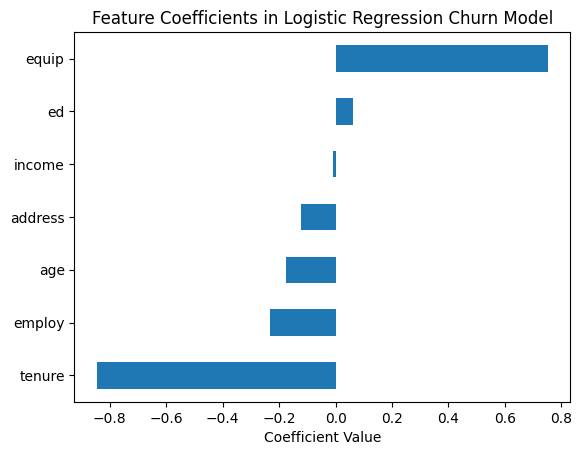

In [63]:
coefficients = pd.Series(LR.coef_[0], index=churn_df.columns[:-1])
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Coefficients in Logistic Regression Churn Model")
plt.xlabel("Coefficient Value")
plt.show()

#### Avaliando a performance do modelo

<h5>Log Loss</h5>

Log Loss (Perda Logarítmica) ou Entropia Cruzada é uma métrica fundamental em aprendizado de máquina para avaliar modelos de classificação, medindo a performance ao comparar as probabilidades previstas pelo modelo com os rótulos reais

In [64]:
log_loss(y_test, yhat_prob)

0.6257718410257235

#### Visualizando o Hiperplano da Regressão Logística

O hiperplano de decisão da regressão logística é definido pela equação:

**z = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ**

Onde a probabilidade é calculada pela função sigmoide: **P(y) = 1 / (1 + e⁻ᶻ)**

A fronteira de decisão ocorre quando **z = 0** (probabilidade = 0.5)

In [65]:
# Exibindo os coeficientes e o intercept
print("Intercept (θ₀):", LR.intercept_[0])
print("\nCoeficientes (θ₁, θ₂, ..., θₙ):")
for i, feature in enumerate(churn_df.columns[:-1]):
    print(f"  {feature}: {LR.coef_[0][i]:.4f}")

print("\n" + "="*50)
print("Equação do hiperplano (z):")
print("="*50)
equation = f"z = {LR.intercept_[0]:.4f}"
for i, feature in enumerate(churn_df.columns[:-1]):
    coef = LR.coef_[0][i]
    sign = "+" if coef >= 0 else ""
    equation += f" {sign} {coef:.4f}*{feature}"
print(equation)
print("\nProbabilidade: P(churn=1) = 1 / (1 + e^(-z))")
print("Fronteira de decisão: z = 0 (P = 0.5)")

Intercept (θ₀): -1.471136114755415

Coeficientes (θ₁, θ₂, ..., θₙ):
  tenure: -0.8457
  age: -0.1757
  address: -0.1242
  income: -0.0102
  ed: 0.0601
  employ: -0.2329
  equip: 0.7520

Equação do hiperplano (z):
z = -1.4711  -0.8457*tenure  -0.1757*age  -0.1242*address  -0.0102*income + 0.0601*ed  -0.2329*employ + 0.7520*equip

Probabilidade: P(churn=1) = 1 / (1 + e^(-z))
Fronteira de decisão: z = 0 (P = 0.5)


**Visualização 2D**: Como temos 8 dimensões, vamos projetar em 2D usando as duas features mais importantes:

Duas features mais importantes: tenure e equip


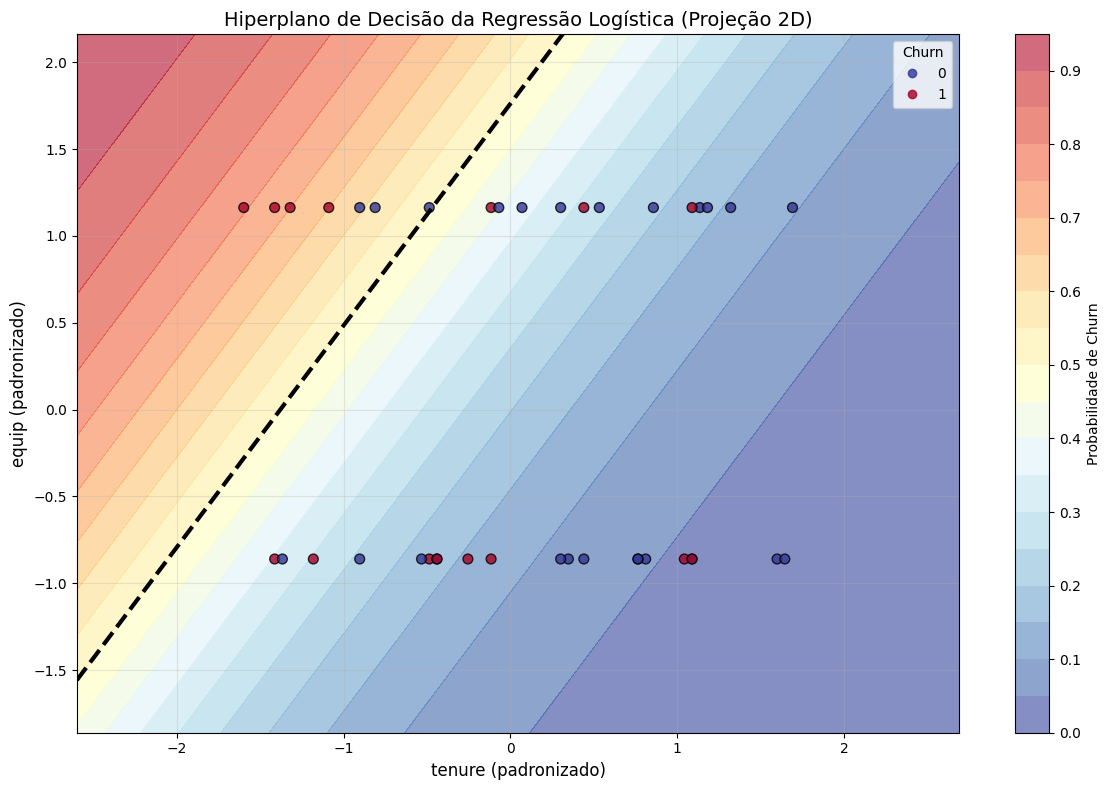


A linha tracejada preta é a fronteira de decisão (z=0, P=0.5)
Região azul: baixa probabilidade de churn
Região vermelha: alta probabilidade de churn


In [66]:
# Identificar as duas features mais importantes (maior coeficiente absoluto)
coef_abs = np.abs(LR.coef_[0])
top_2_indices = np.argsort(coef_abs)[-2:][::-1]
feature_names = churn_df.columns[:-1]

print(f"Duas features mais importantes: {feature_names[top_2_indices[0]]} e {feature_names[top_2_indices[1]]}")

# Treinar um modelo apenas com essas duas features para visualização
LR_2d = LogisticRegression().fit(X_train[:, top_2_indices], y_train)

# Criar malha de pontos para plotar a fronteira de decisão
x_min, x_max = X_test[:, top_2_indices[0]].min() - 1, X_test[:, top_2_indices[0]].max() + 1
y_min, y_max = X_test[:, top_2_indices[1]].min() - 1, X_test[:, top_2_indices[1]].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# Calcular probabilidades para cada ponto da malha
Z = LR_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

# Plotar
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, levels=20, cmap='RdYlBu_r', alpha=0.6)
plt.colorbar(label='Probabilidade de Churn')

# Plotar a fronteira de decisão (probabilidade = 0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=3, linestyles='--')

# Plotar os pontos de teste
scatter = plt.scatter(X_test[:, top_2_indices[0]], X_test[:, top_2_indices[1]], 
                     c=y_test, cmap='RdYlBu_r', edgecolors='black', s=50, alpha=0.8)

plt.xlabel(f'{feature_names[top_2_indices[0]]} (padronizado)', fontsize=12)
plt.ylabel(f'{feature_names[top_2_indices[1]]} (padronizado)', fontsize=12)
plt.title('Hiperplano de Decisão da Regressão Logística (Projeção 2D)', fontsize=14)
plt.legend(*scatter.legend_elements(), title="Churn", loc="upper right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nA linha tracejada preta é a fronteira de decisão (z=0, P=0.5)")
print("Região azul: baixa probabilidade de churn")
print("Região vermelha: alta probabilidade de churn")

**Visualização da Função Sigmoide**: Como z varia com as previsões:

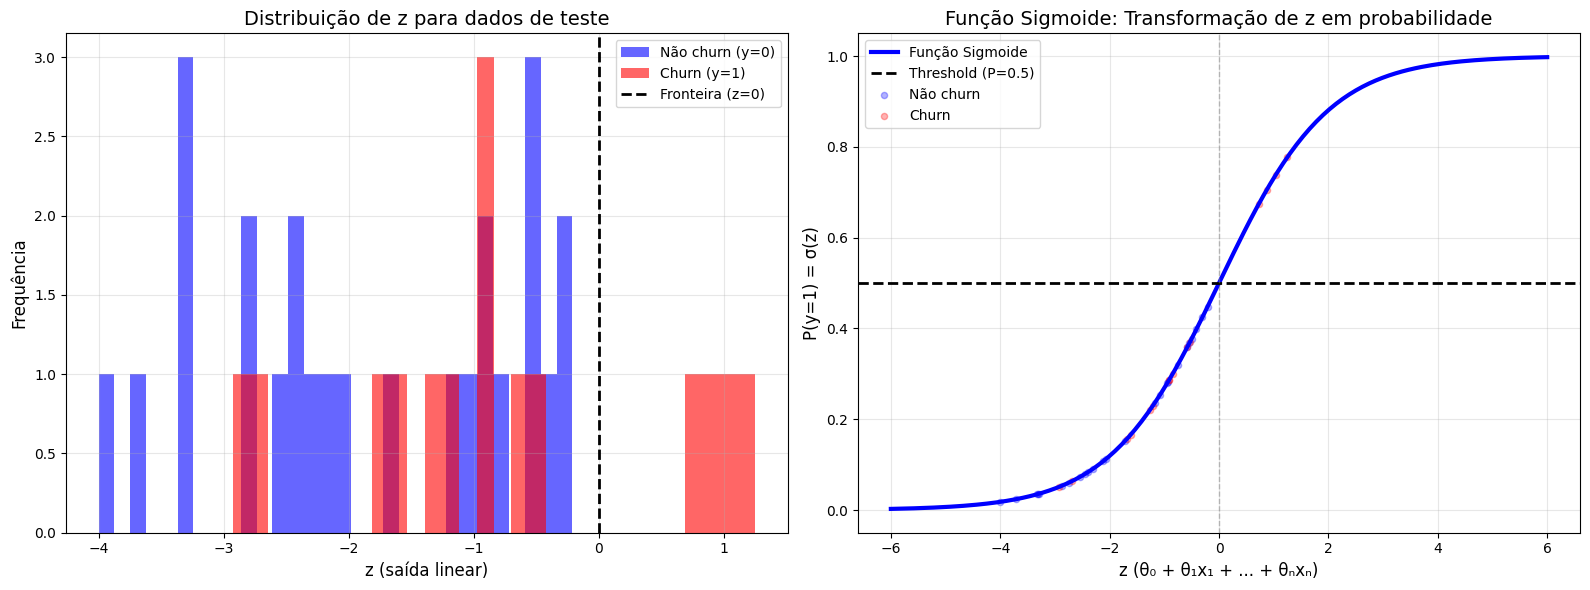


Interpretação:
• z < 0 → P(churn) < 0.5 → Classe prevista: Não churn (0)
• z = 0 → P(churn) = 0.5 → Fronteira de decisão
• z > 0 → P(churn) > 0.5 → Classe prevista: Churn (1)


In [67]:
# Calcular z (antes da sigmoide) para os dados de teste
z_test = LR.intercept_[0] + np.dot(X_test, LR.coef_[0])

# Calcular probabilidades usando a sigmoide
prob_test = 1 / (1 + np.exp(-z_test))

# Plotar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico 1: Distribuição de z
ax1.hist(z_test[y_test == 0], bins=30, alpha=0.6, label='Não churn (y=0)', color='blue')
ax1.hist(z_test[y_test == 1], bins=30, alpha=0.6, label='Churn (y=1)', color='red')
ax1.axvline(x=0, color='black', linestyle='--', linewidth=2, label='Fronteira (z=0)')
ax1.set_xlabel('z (saída linear)', fontsize=12)
ax1.set_ylabel('Frequência', fontsize=12)
ax1.set_title('Distribuição de z para dados de teste', fontsize=14)
ax1.legend()
ax1.grid(alpha=0.3)

# Gráfico 2: Função Sigmoide
z_range = np.linspace(-6, 6, 200)
sigmoid = 1 / (1 + np.exp(-z_range))

ax2.plot(z_range, sigmoid, 'b-', linewidth=3, label='Função Sigmoide')
ax2.axhline(y=0.5, color='black', linestyle='--', linewidth=2, label='Threshold (P=0.5)')
ax2.axvline(x=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)
ax2.scatter(z_test[y_test == 0], prob_test[y_test == 0], alpha=0.3, s=20, c='blue', label='Não churn')
ax2.scatter(z_test[y_test == 1], prob_test[y_test == 1], alpha=0.3, s=20, c='red', label='Churn')
ax2.set_xlabel('z (θ₀ + θ₁x₁ + ... + θₙxₙ)', fontsize=12)
ax2.set_ylabel('P(y=1) = σ(z)', fontsize=12)
ax2.set_title('Função Sigmoide: Transformação de z em probabilidade', fontsize=14)
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

print("\nInterpretação:")
print("• z < 0 → P(churn) < 0.5 → Classe prevista: Não churn (0)")
print("• z = 0 → P(churn) = 0.5 → Fronteira de decisão")
print("• z > 0 → P(churn) > 0.5 → Classe prevista: Churn (1)")

#### Análise Contextual dos Gráficos de Churn

**Contexto do Dataset:**
Este é um dataset de **churn de telecomunicações** - clientes que cancelam seus serviços. As variáveis incluem:
- **tenure**: tempo como cliente (meses)
- **age**: idade do cliente
- **address**: tempo no endereço atual
- **income**: renda
- **ed**: nível educacional
- **employ**: tempo de emprego
- **equip**: se possui equipamento adicional

**O que os gráficos revelam:**

#### 1. Gráfico de Coeficientes (Barras Horizontais)
**Insights de negócio:**
- **Coeficientes negativos** (barra para esquerda): Reduzem a probabilidade de churn
  - `tenure` e `address` com valores negativos indicam que **clientes mais antigos e estáveis tendem a PERMANECER**
  - Quanto mais tempo um cliente fica, menor a chance de sair
  
- **Coeficientes positivos** (barra para direita): Aumentam probabilidade de churn
  - Variáveis como `equip` ou `income` podem indicar que **clientes com certos perfis são mais propensos a sair**

**Ação empresarial:** Focar em reter clientes novos (baixo tenure) com programas de fidelidade nos primeiros meses.

#### 2. Hiperplano 2D (Mapa de Calor com Fronteira)
**O que representa:**
Este gráfico projeta o espaço de 8 dimensões em apenas 2 (as features mais importantes), mostrando:

- **Cores azuis**: Região de baixo risco de churn - clientes "seguros"
- **Cores vermelhas**: Região de alto risco de churn - clientes "em risco"
- **Linha tracejada preta**: Fronteira de decisão onde o modelo está "na dúvida" (50% de probabilidade)

**Insights práticos:**
- Pontos azuis do lado vermelho = **clientes em risco que o modelo pode perder**
- Pontos vermelhos do lado azul = **falsos positivos - clientes que parecem estáveis mas podem sair**
- A separação das cores mostra **quão bem o modelo distingue os grupos**

**Aplicação:** A empresa pode usar este gráfico para identificar visualmente perfis de clientes e criar **campanhas de retenção direcionadas** para quem está na zona vermelha.

#### 3. Distribuição de z e Função Sigmoide

**Gráfico da Esquerda (Histograma de z):**
- **Ideal:** As barras azuis (não churn) e vermelhas (churn) deveriam estar **bem separadas**
- Se há muita sobreposição perto de z=0, significa que o modelo **tem dificuldade em distinguir** alguns casos
- A distância entre os picos indica **poder de separação do modelo**

**Interpretação de negócio:**
- Clientes com z muito negativo: **baixíssimo risco, clientes fiéis**
- Clientes com z perto de 0: **zona crítica - precisam de atenção especial**
- Clientes com z muito positivo: **alto risco, já têm um pé fora**

**Gráfico da Direita (Curva Sigmoide):**
Mostra como o modelo **converte características do cliente em probabilidade de churn**.

- A **curva em S** é a transformação mágica: pega qualquer número (z) e transforma em probabilidade entre 0 e 1
- Pontos dispersos mostram onde os clientes reais estão posicionados
- **Zona íngreme da curva** (perto de z=0): Pequenas mudanças nas características causam grandes mudanças na previsão

**Aplicação prática:**
- Clientes na parte íngreme são **sensíveis a intervenções** - um desconto ou upgrade pode mudar a decisão
- Clientes nos extremos já estão "decididos" - precisam de ações mais drásticas

**Conclusão de Negócio:**
O modelo está criando um **sistema de triagem inteligente** que permite à empresa:
1. **Priorizar recursos** nos clientes de médio risco
2. **Automatizar ações** para alto/baixo risco
3. **Entender quais características** mais influenciam a decisão de sair
4. **Simular cenários**: "Se aumentarmos o tenure deste cliente, como muda sua probabilidade de churn?"

### Criação de Modelos de aprendizagem supervisionada

#### Classificação

<h5>Pré-processando os dados:</h5>

In [ ]:
# Importando bibliotecas necessárias
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Carregando o dataset Iris (3 classes)
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Conjunto de treino: {X_train.shape}")
print(f"Conjunto de teste: {X_test.shape}")
print(f"Classes: {iris.target_names}")

#### Estratégia One-vs-All (OvA) ou One-vs-Rest (OvR)

Na estratégia **One-vs-All**, para um problema com N classes, treinamos N classificadores binários. Cada classificador separa uma classe de todas as outras. Durante a predição, escolhemos a classe com maior confiança.

In [ ]:
# Criando classificador One-vs-All com SVM
ova_classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

# Treinando o modelo
ova_classifier.fit(X_train, y_train)

# Fazendo predições
y_pred_ova = ova_classifier.predict(X_test)

# Avaliando o modelo
accuracy_ova = accuracy_score(y_test, y_pred_ova)
print(f"Acurácia One-vs-All: {accuracy_ova:.4f}")
print(f"\nNúmero de classificadores treinados: {len(ova_classifier.estimators_)}")
print(f"(Um classificador para cada classe)")

print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred_ova, target_names=iris.target_names))

In [ ]:
# Visualizando a matriz de confusão para One-vs-All
import matplotlib.pyplot as plt
import seaborn as sns

cm_ova = confusion_matrix(y_test, y_pred_ova)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ova, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Matriz de Confusão - One-vs-All')
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.show()

#### Estratégia One-vs-One (OvO)

Na estratégia **One-vs-One**, para um problema com N classes, treinamos N×(N-1)/2 classificadores binários. Cada classificador separa um par de classes. Durante a predição, usamos votação: cada classificador vota em uma classe, e a classe com mais votos é escolhida.

In [ ]:
# Criando classificador One-vs-One com SVM
ovo_classifier = OneVsOneClassifier(SVC(kernel='linear', random_state=42))

# Treinando o modelo
ovo_classifier.fit(X_train, y_train)

# Fazendo predições
y_pred_ovo = ovo_classifier.predict(X_test)

# Avaliando o modelo
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)
print(f"Acurácia One-vs-One: {accuracy_ovo:.4f}")
print(f"\nNúmero de classificadores treinados: {len(ovo_classifier.estimators_)}")
print(f"(Para 3 classes: 3×(3-1)/2 = 3 classificadores)")

print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred_ovo, target_names=iris.target_names))

In [ ]:
# Visualizando a matriz de confusão para One-vs-One
cm_ovo = confusion_matrix(y_test, y_pred_ovo)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ovo, annot=True, fmt='d', cmap='Greens', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Matriz de Confusão - One-vs-One')
plt.ylabel('Classe Real')
plt.xlabel('Classe Predita')
plt.show()

#### Comparação entre One-vs-All e One-vs-One

In [ ]:
# Comparação de desempenho
import pandas as pd

comparacao = pd.DataFrame({
    'Estratégia': ['One-vs-All', 'One-vs-One'],
    'Acurácia': [accuracy_ova, accuracy_ovo],
    'Nº Classificadores': [len(ova_classifier.estimators_), len(ovo_classifier.estimators_)]
})

print("=== Comparação de Estratégias ===\n")
print(comparacao.to_string(index=False))

print("\n\n=== Características ===")
print("\nOne-vs-All (OvA):")
print("  ✓ Treina N classificadores (um para cada classe)")
print("  ✓ Mais eficiente para muitas classes")
print("  ✓ Cada classificador separa uma classe de todas as outras")

print("\nOne-vs-One (OvO):")
print("  ✓ Treina N×(N-1)/2 classificadores (um para cada par)")
print("  ✓ Pode ser mais preciso, mas mais custoso")
print("  ✓ Usa votação para decisão final")

#### Exemplo com mais classes

Vamos testar com um dataset que tem mais classes para ver melhor a diferença no número de classificadores:

In [ ]:
# Usando o dataset digits (10 classes: dígitos de 0 a 9)
from sklearn.datasets import load_digits

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

# Dividindo em treino e teste
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_digits, y_digits, test_size=0.3, random_state=42
)

print(f"Dataset: {len(np.unique(y_digits))} classes (dígitos de 0 a 9)")
print(f"Amostras de treino: {X_train_d.shape[0]}")
print(f"Amostras de teste: {X_test_d.shape[0]}")

# One-vs-All
ova_digits = OneVsRestClassifier(SVC(kernel='rbf', random_state=42))
ova_digits.fit(X_train_d, y_train_d)
y_pred_ova_d = ova_digits.predict(X_test_d)

# One-vs-One
ovo_digits = OneVsOneClassifier(SVC(kernel='rbf', random_state=42))
ovo_digits.fit(X_train_d, y_train_d)
y_pred_ovo_d = ovo_digits.predict(X_test_d)

print(f"\n=== Resultados com 10 classes ===")
print(f"\nOne-vs-All:")
print(f"  • Classificadores treinados: {len(ova_digits.estimators_)}")
print(f"  • Acurácia: {accuracy_score(y_test_d, y_pred_ova_d):.4f}")

print(f"\nOne-vs-One:")
print(f"  • Classificadores treinados: {len(ovo_digits.estimators_)} (10×9/2)")
print(f"  • Acurácia: {accuracy_score(y_test_d, y_pred_ovo_d):.4f}")